# Coding vs non-coding
K-mer count features extracted from GenCode pc and nc RNA. 
Use GenCode 34. 
Use one RNA per gene; the one transcript with median length (use floor where count is even).

## Import Non-coding Instances

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
ncfile='ncRNA.2mer.features.csv'
nc_features = pd.read_csv(ncfile,header=0)
nc_features.head()
# Our non-coding sequence numbers start at 1. 

,seqnum,seqlen,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
0,1,535,39,21,38,30,31,48,11,44,31,30,26,28,27,36,40,54
1,2,590,37,21,47,27,43,55,9,51,35,42,55,26,18,40,46,37
2,3,629,61,30,53,41,48,41,5,45,48,30,31,32,28,38,51,46
3,4,1319,109,68,127,77,110,75,16,82,106,79,100,58,57,61,100,93
4,5,323,16,21,26,12,28,23,4,21,24,23,31,19,7,9,37,21


In [46]:
nc_features.shape

(17766, 18)

In [47]:
# Longest sequence in each class.
# Yes, there is a 200Kb lncRNA!
nc_features['seqlen'].max(), pc_features['seqlen'].max()

(23112, 21470)

In [48]:
# Shortes sequence in each class
nc_features['seqlen'].min(), pc_features['seqlen'].min()

(200, 8)

In [49]:
nc_labels_temp=[0]*nc_features.shape[0]
pc_labels_temp=[1]*pc_features.shape[0]
nc_labels=pd.core.frame.DataFrame(nc_labels_temp)
pc_labels=pd.core.frame.DataFrame(pc_labels_temp)
nc_labels.shape, pc_labels.shape

((17766, 1), (20365, 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faed2616b50>]],
      dtype=object)

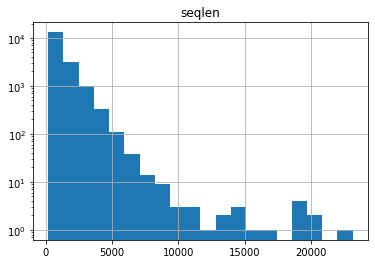

In [51]:
# In preprocessing, we removed ~180 seqs < 200bp and 3 seqs > 30Kbp.
# There are still ~20 outliers having len > 12Kbp.
nc_features.hist(column='seqlen',bins=20, log=True)

In [52]:
# Max lengths ae 205K, 92K, 49K, 37K, 23K, ...
def too_big(x):
    return x>=12000

truefalse=nc_features.apply(lambda x: too_big(x['seqlen']), axis=1)
truefalse[truefalse==True]
nc_features.loc[truefalse[truefalse==True].index]

,seqnum,seqlen,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
976,977,14107,1246,703,953,1133,986,726,140,1074,838,567,689,713,965,929,1026,1418
3148,3149,15214,1646,814,983,1188,1034,687,84,1088,907,512,608,769,1044,880,1121,1848
7782,7783,12727,1238,560,852,1013,818,650,95,943,768,479,646,652,839,817,952,1404
10912,10913,18662,1468,847,1451,1087,1220,976,292,1336,1197,973,1253,1145,968,1028,1571,1849
15613,15614,19049,825,831,1307,678,1284,2001,610,1610,1033,1477,1961,982,500,1196,1574,1179
17001,17002,20396,1594,1074,1638,1050,1687,1614,431,1496,1257,1323,1600,931,818,1217,1442,1223
17091,17092,13120,1114,694,1056,711,1101,984,217,990,823,780,965,602,537,834,932,779
17159,17160,16698,1413,873,1350,910,1298,1114,223,1307,1062,946,1140,824,773,1009,1259,1196
17201,17202,14574,1109,688,1054,921,1101,1005,216,1074,837,805,938,790,725,898,1162,1250
17223,17224,19416,1309,863,1535,1084,1405,1284,321,1453,1173,1196,1365,1111,904,1120,1625,1667


In [35]:
# Drop the big ones.
nc_features=nc_features.drop(truefalse[truefalse==True].index)
nc_features.shape

(17955, 18)

In [36]:
# Use the standard definition of lncRNA: len>=200.
def too_small(x):
    return x<200

truefalse=nc_features.apply(lambda x: too_small(x['seqlen']), axis=1)
nc_features.loc[truefalse[truefalse==True].index]

,seqnum,seqlen,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
265,266,184,18,11,12,14,17,6,2,11,14,6,12,9,6,13,15,17
275,276,131,9,4,7,8,7,3,10,6,8,11,13,9,3,9,11,12
311,312,32,0,1,4,1,2,2,1,1,4,1,6,2,0,2,3,1
484,485,171,20,6,10,18,11,4,0,14,15,8,10,6,9,11,18,10
503,504,157,12,8,10,7,8,8,2,22,11,10,10,4,5,14,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17428,17429,183,19,9,11,16,16,13,2,12,13,10,10,9,8,10,19,5
17768,17769,195,22,11,13,15,16,11,0,16,10,9,5,8,13,12,14,19
17825,17826,142,18,11,8,12,11,5,2,13,7,4,1,3,13,11,4,18
17946,17947,166,11,4,13,11,13,10,0,11,14,7,10,11,2,13,18,17


In [37]:
# Drop the little ones.
nc_features=nc_features.drop(truefalse[truefalse==True].index)
nc_features.shape

(17766, 18)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faed1e27ca0>]],
      dtype=object)

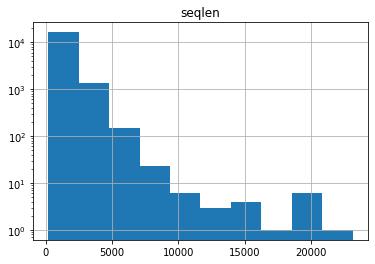

In [38]:
nc_features.hist(column='seqlen',bins=10, log=True)

## Import Protein-coding instances

In [41]:
pcfile='pcRNA.2mer.features.csv'
pc_features = pd.read_csv(pcfile,header=0)
pc_features.head()
# Our protein-coding sequence numbers start at 50,000.
# Yes, the GenCode FASTA actually has 2 identical transcripts from different genes. 
# Suspicously, there are 365 transcripts of length 582, from many genes.

,seqnum,seqlen,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
0,50000,1054,62,56,53,91,78,57,13,91,55,38,40,65,67,89,92,106
1,50001,995,41,54,54,66,79,68,8,99,48,42,47,63,46,90,92,97
2,50002,995,41,54,54,66,79,68,8,99,48,42,47,63,46,90,92,97
3,50003,2191,75,104,173,42,154,305,136,162,143,236,259,68,22,111,138,62
4,50004,2757,123,131,251,77,201,234,124,219,219,254,273,125,40,159,222,104


In [42]:
pc_features.shape

(20365, 18)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faed2956ac0>]],
      dtype=object)

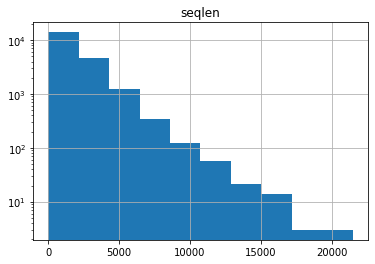

In [43]:
# Exponential decay till about 15Kb.
pc_features.hist(column='seqlen',bins=10, log=True)
# Longest is 21470